# Load Data

In [1]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=863c772a44af251d1bb3ec6b7968efe86cae66325a66ed5dafe68c2bc3509b9b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lifelines
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [3]:
df_metabric = pd.read_csv('/content/Breast Cancer METABRIC.csv')


In [4]:
df_metabric.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


# EDA

In [5]:

print(df_metabric.info())
print(df_metabric.describe())

# Missing Data Analysis
missing_values = df_metabric.isnull().sum()
print(missing_values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [6]:
# Drop if 'Overall Survival Status' or 'Relapse Free Status' is NaN
df_metabric = df_metabric.dropna(subset=['Overall Survival Status', 'Relapse Free Status'])

In [55]:
df_metabric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1984
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      1980 non-null   object 
 1   Age at Diagnosis                1980 non-null   float64
 2   Type of Breast Surgery          1954 non-null   object 
 3   Cancer Type                     1980 non-null   object 
 4   Cancer Type Detailed            1980 non-null   object 
 5   Cellularity                     1916 non-null   object 
 6   Chemotherapy                    1979 non-null   object 
 7   Pam50 + Claudin-low subtype     1979 non-null   object 
 8   Cohort                          1980 non-null   float64
 9   ER status measured by IHC       1937 non-null   object 
 10  ER Status                       1980 non-null   object 
 11  Neoplasm Histologic Grade       1892 non-null   float64
 12  HER2 status measured by SNP6    19

In [7]:
# Change data type
df_metabric = df_metabric.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)
df_metabric['Patient ID'] =  df_metabric['Patient ID'].astype('object')

tumor_stage_type = CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True)
df_metabric['Tumor Stage'] = df_metabric['Tumor Stage'].astype(tumor_stage_type)


In [57]:
df_metabric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1984
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      1980 non-null   object  
 1   Age at Diagnosis                1980 non-null   float64 
 2   Type of Breast Surgery          1954 non-null   category
 3   Cancer Type                     1980 non-null   category
 4   Cancer Type Detailed            1980 non-null   category
 5   Cellularity                     1916 non-null   category
 6   Chemotherapy                    1979 non-null   category
 7   Pam50 + Claudin-low subtype     1979 non-null   category
 8   Cohort                          1980 non-null   float64 
 9   ER status measured by IHC       1937 non-null   category
 10  ER Status                       1980 non-null   category
 11  Neoplasm Histologic Grade       1892 non-null   float64 
 12  HER2 status measured

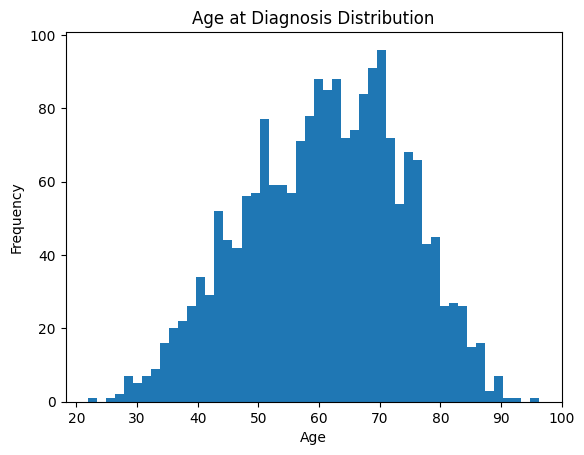

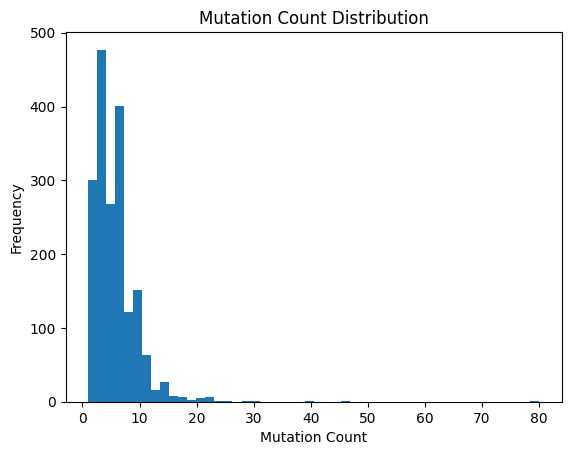

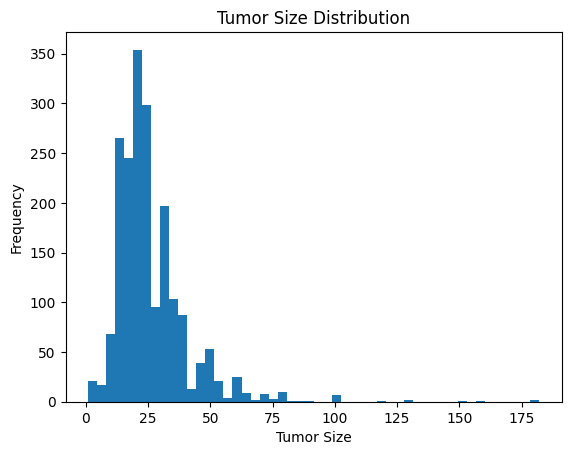

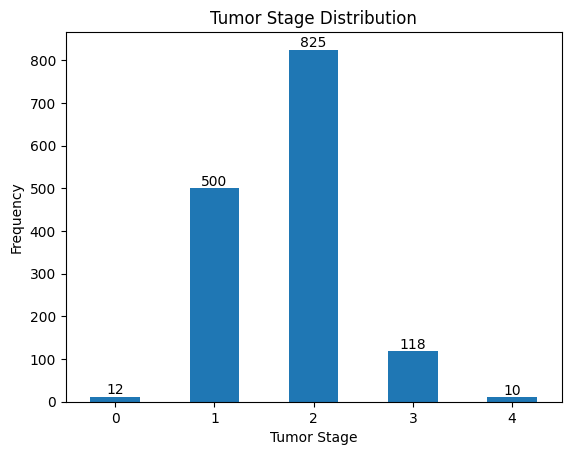

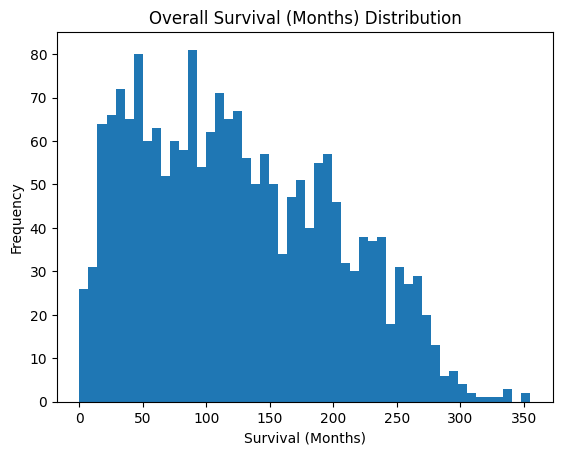

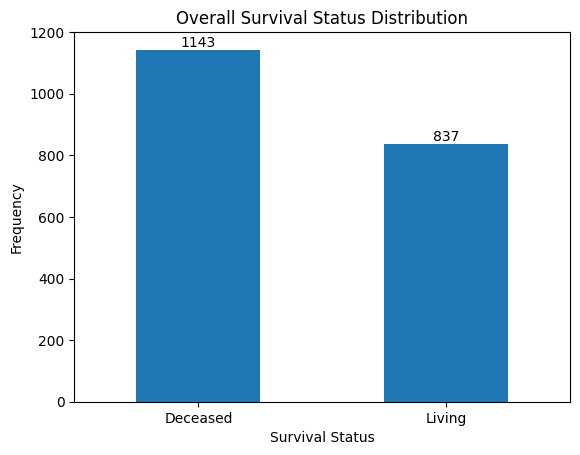

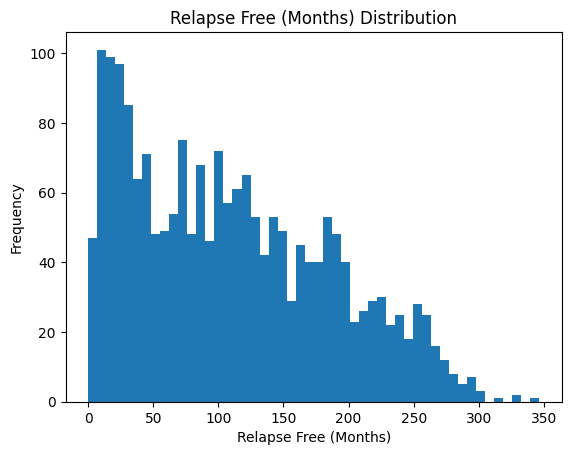

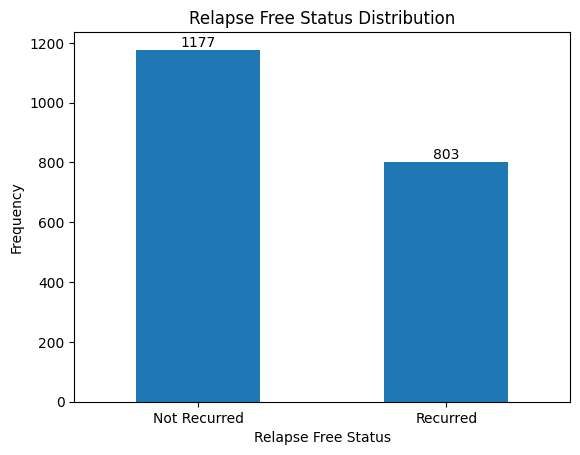

In [8]:
# Univariate Analysis
# For a numerical variable

df_metabric['Age at Diagnosis'].hist(bins=50)
plt.title('Age at Diagnosis Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

df_metabric['Mutation Count'].hist(bins=50)
plt.title('Mutation Count Distribution')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

df_metabric['Tumor Size'].hist(bins=50)
plt.title('Tumor Size Distribution')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

ax = df_metabric['Tumor Stage'].value_counts().sort_index().plot(kind='bar')
plt.title('Tumor Stage Distribution')
plt.xlabel('Tumor Stage')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

df_metabric['Overall Survival (Months)'].hist(bins=50)
plt.title('Overall Survival (Months) Distribution')
plt.xlabel('Survival (Months)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

ax = df_metabric['Overall Survival Status'].value_counts().plot(kind='bar')
plt.title('Overall Survival Status Distribution')
plt.xlabel('Survival Status')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

df_metabric['Relapse Free Status (Months)'].hist(bins=50)
plt.title('Relapse Free (Months) Distribution')
plt.xlabel('Relapse Free (Months)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

ax = df_metabric['Relapse Free Status'].value_counts().plot(kind='bar')
plt.title('Relapse Free Status Distribution')
plt.xlabel('Relapse Free Status')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()



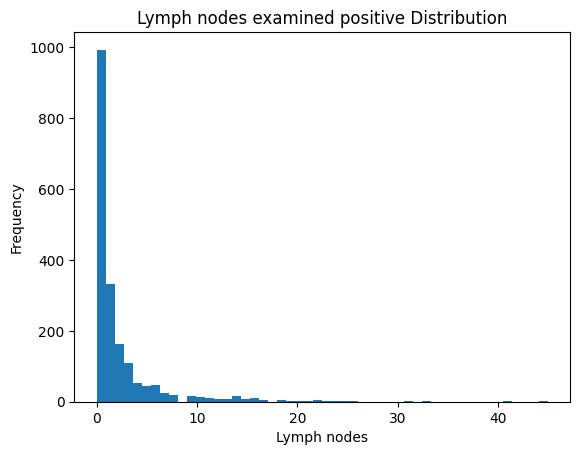

In [200]:
df_metabric['Lymph nodes examined positive'].hist(bins=50)
plt.title('Lymph nodes examined positive Distribution')
plt.xlabel('Lymph nodes')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

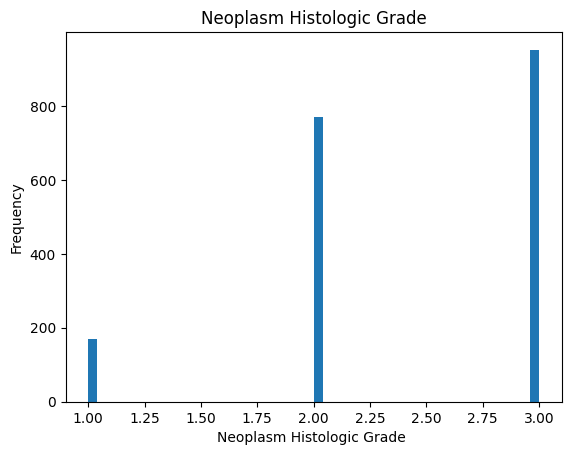

In [9]:
df_metabric['Neoplasm Histologic Grade'].hist(bins=50)
plt.title('Neoplasm Histologic Grade')
plt.xlabel('Neoplasm Histologic Grade ')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

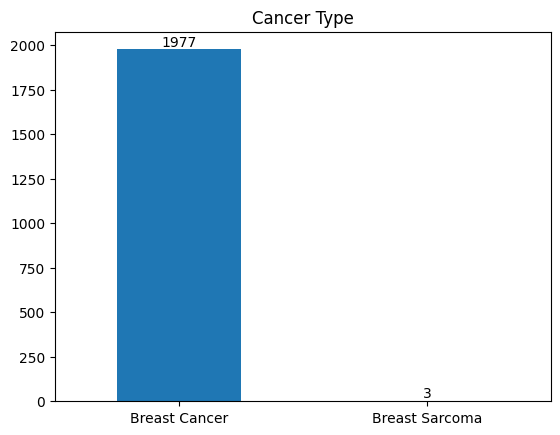

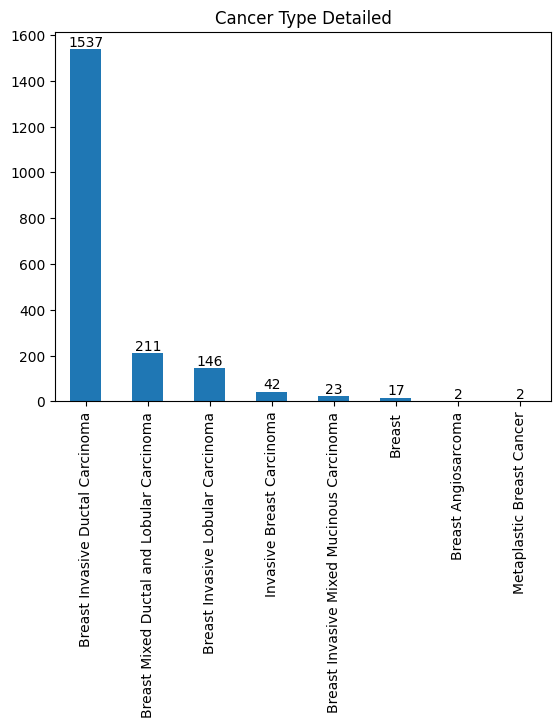

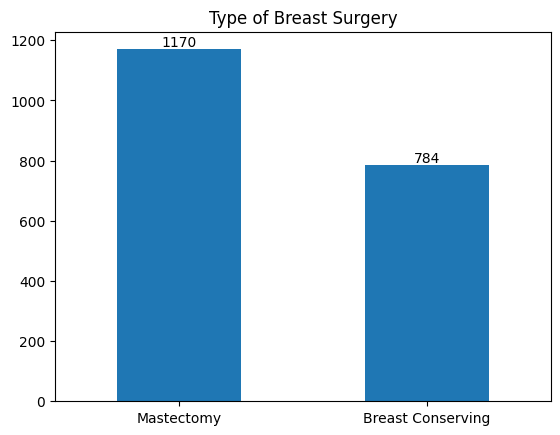

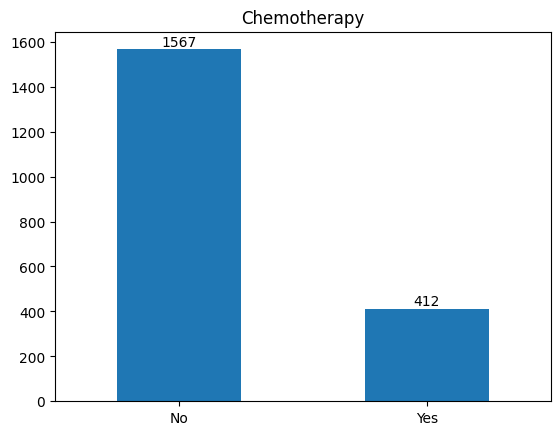

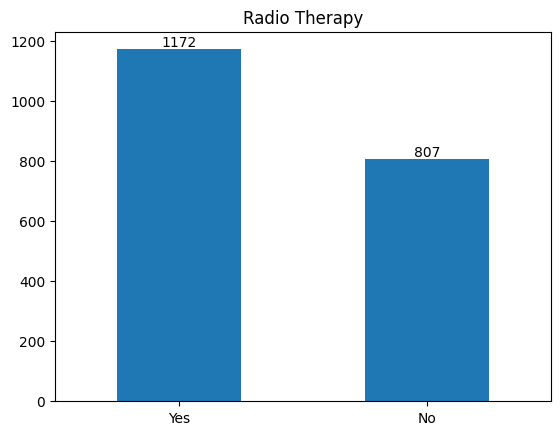

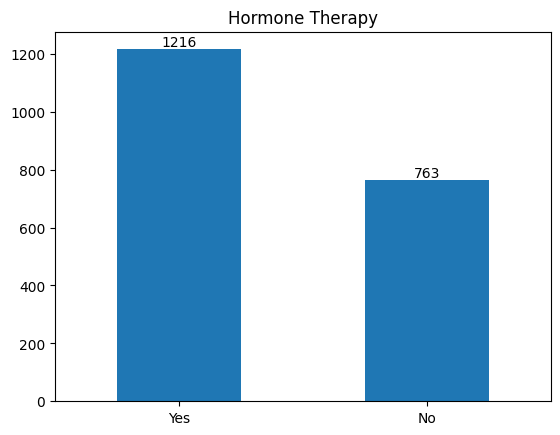

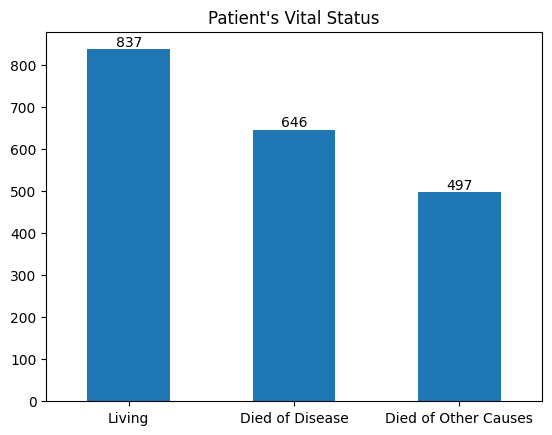

In [59]:
# For a categorical variable
ax = df_metabric['Cancer Type'].value_counts().plot(kind='bar')
plt.title('Cancer Type')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df_metabric['Cancer Type Detailed'].value_counts().plot(kind='bar')
plt.title('Cancer Type Detailed')
plt.grid(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df_metabric['Type of Breast Surgery'].value_counts().plot(kind='bar')
plt.title('Type of Breast Surgery')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df_metabric['Chemotherapy'].value_counts().plot(kind='bar')
plt.title('Chemotherapy')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df_metabric['Radio Therapy'].value_counts().plot(kind='bar')
plt.title('Radio Therapy')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df_metabric['Hormone Therapy'].value_counts().plot(kind='bar')
plt.title('Hormone Therapy')
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = df_metabric["Patient's Vital Status"].value_counts().plot(kind='bar')
plt.title("Patient's Vital Status")
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()




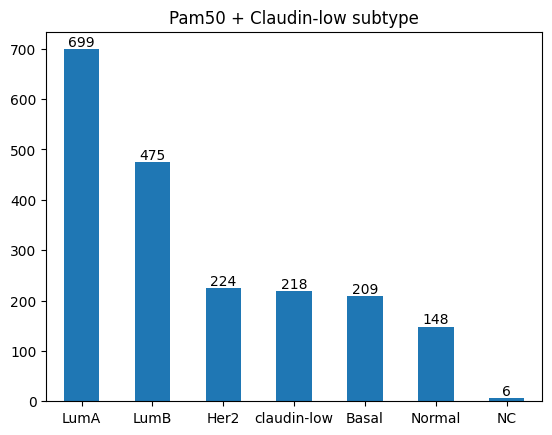

In [199]:
ax = df_metabric["Pam50 + Claudin-low subtype"].value_counts().plot(kind='bar')
plt.title("Pam50 + Claudin-low subtype")
plt.grid(False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [60]:
# Drop 'cohort'
df_metabric = df_metabric.drop(['Cohort'], axis=1)

<ipython-input-61-5d45125be115>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_metabric.corr()


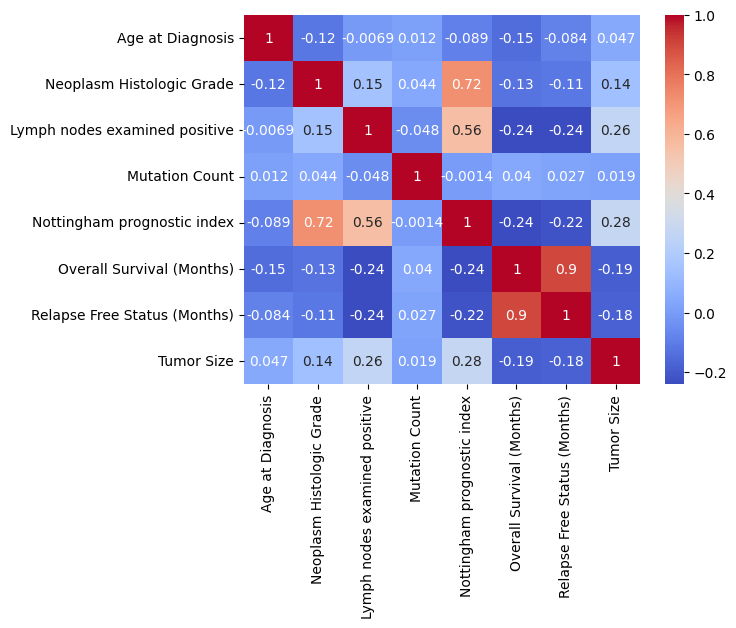

In [61]:
# Bivariate/Multivariate Analysis
# Correlation matrix
corr_matrix = df_metabric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



# Archive: PCA

In [ ]:
# # # Pairplot for selected features
# # sns.pairplot(df_metabric[['feature1', 'feature2', 'feature3']])
# # plt.show()

# # Survival Analysis (if survival data is available)
# # Example with Kaplan-Meier curve (requires lifelines library)
# # from lifelines import KaplanMeierFitter
# # kmf = KaplanMeierFitter()
# # T = df_metabric['duration'] # duration until event or censoring
# # E = df_metabric['event_occurred'] # event occurred or censored
# # kmf.fit(T, event_observed=E)
# # kmf.plot_survival_function()
# # plt.show()

# # Dimensionality Reduction (e.g., PCA)
from sklearn.decomposition import PCA
# pca = PCA(n_components=2)

# principal_components = pca.fit_transform(df_metabric.drop(['Patient ID'], axis=1))
# plt.scatter(principal_components[:, 0], principal_components[:, 1])
# plt.show()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# categorical_columns = df_metabric.select_dtypes(include=['object']).columns

# label_encoder = LabelEncoder()
# for column in categorical_columns:
#     df_metabric[column] = label_encoder.fit_transform(df_metabric[column])

In [ ]:
# prompt: PCA

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(df_metabric.drop(['Patient ID'], axis=1))
# plt.scatter(principal_components[:, 0], principal_components[:, 1])
# plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_std = StandardScaler().fit_transform(df_metabric.drop(['Patient ID'], axis=1))

In [ ]:
pca = PCA(n_components='mle')
pca.fit(X_std)

# Step 5: Choose the number of components
# For demonstration, let's use all components that explain 95% of the variance
pca = PCA(n_components=0.95)
pca.fit(X_std)
X_pca = pca.transform(X_std)


In [ ]:
# X_pca

# Survival analysis for 1. living stat_result 2. relapse

## Kaplan-Meier

In [62]:
df_metabric['Overall Survival (Months)']

0       140.500000
1        84.633333
2       163.700000
3       164.933333
4        41.366667
           ...    
1980    196.866667
1981     44.733333
1982    175.966667
1983     86.233333
1984    201.900000
Name: Overall Survival (Months), Length: 1980, dtype: float64

In [63]:
df_metabric['Overall Survival Status']

0         Living
1         Living
2       Deceased
3         Living
4       Deceased
          ...   
1980      Living
1981    Deceased
1982    Deceased
1983    Deceased
1984    Deceased
Name: Overall Survival Status, Length: 1980, dtype: category
Categories (2, object): ['Deceased', 'Living']

In [64]:
unique_values = df_metabric['Overall Survival Status'].unique()
print(unique_values)


['Living', 'Deceased']
Categories (2, object): ['Deceased', 'Living']


In [65]:
unique_values = df_metabric['Relapse Free Status'].unique()
print(unique_values)

['Not Recurred', 'Recurred']
Categories (2, object): ['Not Recurred', 'Recurred']


In [66]:
df_metabric['Overall Survival Status'] = np.uint8(df_metabric['Overall Survival Status'].map({'Living': 0, 'Deceased': 1}))
df_metabric['Relapse Free Status'] = np.uint8(df_metabric['Relapse Free Status'].map({'Not Recurred': 0, 'Recurred': 1}))

In [67]:
from lifelines import KaplanMeierFitter

In [68]:
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

In [69]:
T_1 = df_metabric['Overall Survival (Months)']
E_1 = df_metabric['Overall Survival Status']

T_2 = df_metabric['Relapse Free Status (Months)']
E_2 = df_metabric['Relapse Free Status']

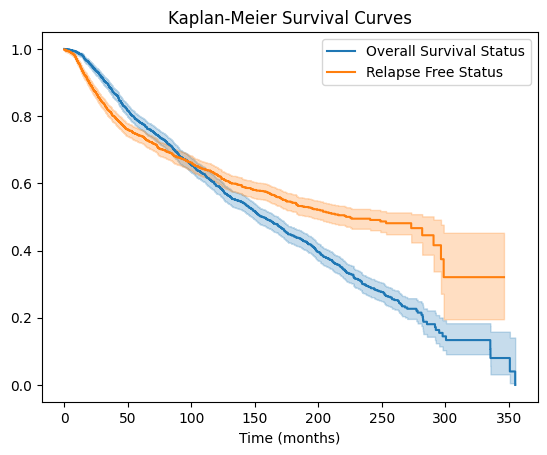

In [70]:
kmf1.fit(T_1, E_1, label='Overall Survival Status')
ax = kmf1.plot_survival_function()

kmf2.fit(T_2, E_2, label='Relapse Free Status')
kmf2.plot_survival_function(ax=ax)

# Add title and labels
plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time (months)')

# Show the plot
plt.show()

### Kaplan-Meier in terms of surgery and therapies

In [71]:
unique_values = df_metabric['Type of Breast Surgery'].unique()
print(unique_values)

['Mastectomy', 'Breast Conserving', NaN]
Categories (2, object): ['Breast Conserving', 'Mastectomy']


In [72]:
BreastConserving = df_metabric['Type of Breast Surgery'] == 'Breast Conserving'
Mastectomy = df_metabric['Type of Breast Surgery'] == 'Mastectomy'
# NoSurgery = df_metabric['Type of Breast Surgery'].isna()

group_labels = ['Breast Conserving', 'Mastectomy']

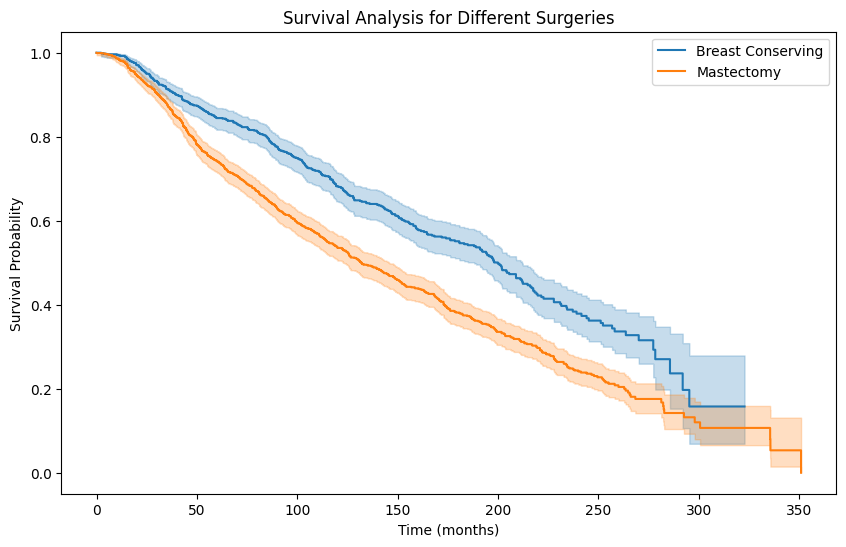

In [73]:
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group, label in zip([BreastConserving, Mastectomy], group_labels):
    kmf.fit(df_metabric['Overall Survival (Months)'][group],
            df_metabric['Overall Survival Status'][group],
            label=label)
    kmf.plot_survival_function()

plt.title('Survival Analysis for Different Surgeries')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.show()

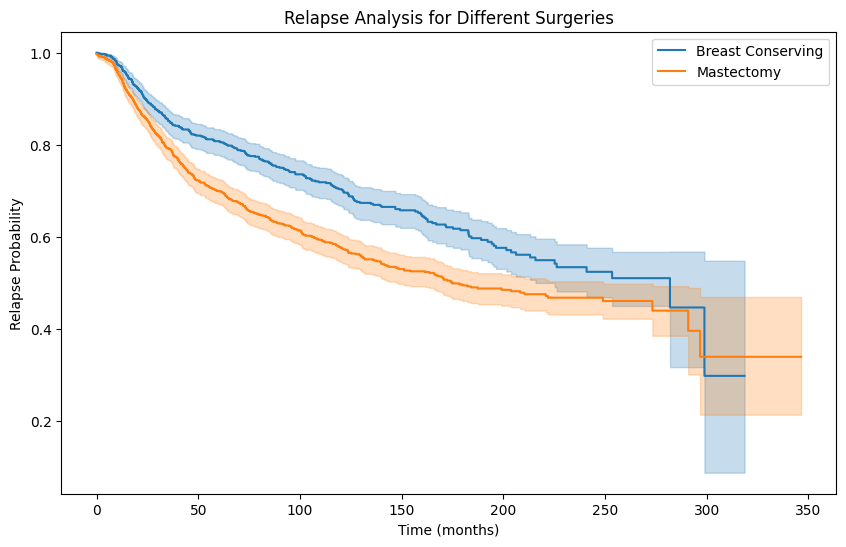

In [74]:
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group, label in zip([BreastConserving, Mastectomy], group_labels):
    kmf.fit(df_metabric['Relapse Free Status (Months)'][group],
            df_metabric['Relapse Free Status'][group],
            label=label)
    kmf.plot_survival_function()

plt.title('Relapse Analysis for Different Surgeries')
plt.xlabel('Time (months)')
plt.ylabel('Relapse Probability')
plt.show()

In [75]:
therapy_columns = ['Chemotherapy', 'Radio Therapy', 'Hormone Therapy']

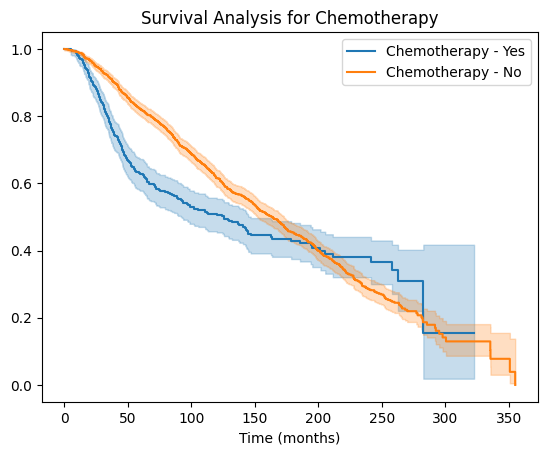

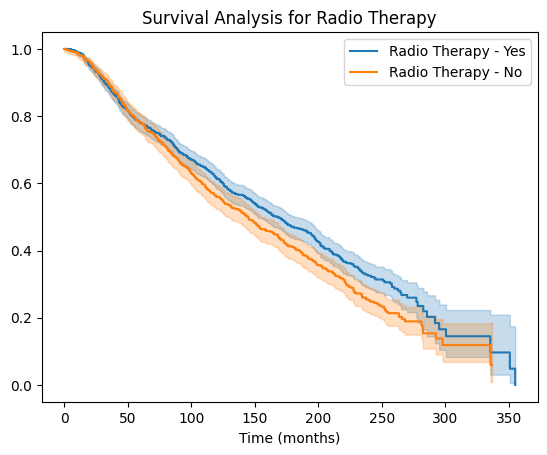

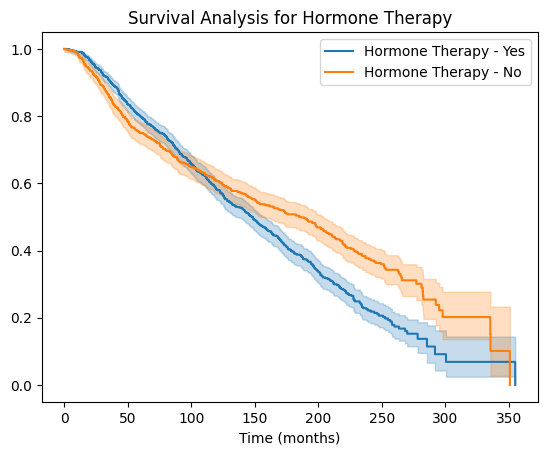

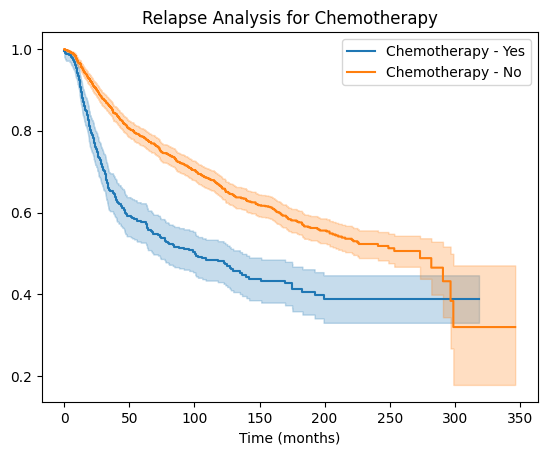

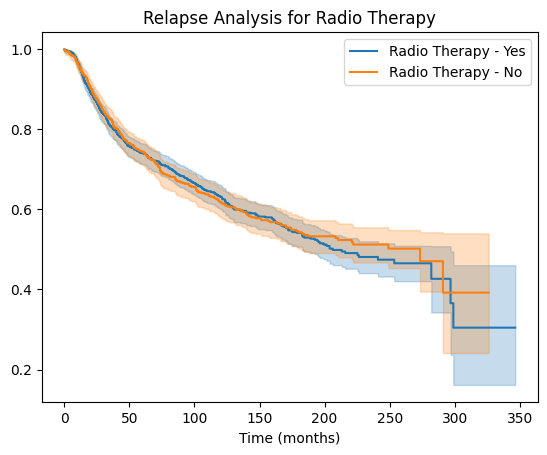

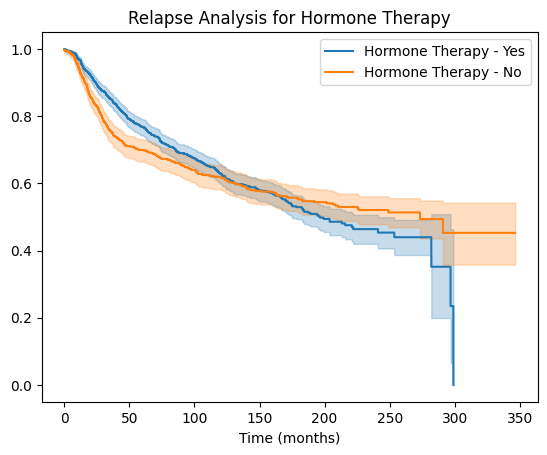

In [76]:
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

for therapy in therapy_columns:
    kmf1.fit(df_metabric['Overall Survival (Months)'][df_metabric[therapy] == 'Yes'], df_metabric['Overall Survival Status'][df_metabric[therapy] == 'Yes'], label=f'{therapy} - Yes')
    ax = kmf1.plot_survival_function()
    kmf2.fit(df_metabric['Overall Survival (Months)'][df_metabric[therapy] == 'No'], df_metabric['Overall Survival Status'][df_metabric[therapy] == 'No'], label=f'{therapy} - No')
    kmf2.plot_survival_function(ax=ax)

    plt.title(f'Survival Analysis for {therapy}')
    plt.xlabel('Time (months)')
    plt.show()

for therapy in therapy_columns:
    kmf1.fit(df_metabric['Relapse Free Status (Months)'][df_metabric[therapy] == 'Yes'], df_metabric['Relapse Free Status'][df_metabric[therapy] == 'Yes'], label=f'{therapy} - Yes')
    ax = kmf1.plot_survival_function()
    kmf2.fit(df_metabric['Relapse Free Status (Months)'][df_metabric[therapy] == 'No'], df_metabric['Relapse Free Status'][df_metabric[therapy] == 'No'], label=f'{therapy} - No')
    kmf2.plot_survival_function(ax=ax)

    plt.title(f'Relapse Analysis for {therapy}')
    plt.xlabel('Time (months)')
    plt.show()

# Random Survival Forest

In [39]:
pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [40]:
!pip install scikit-learn

In [41]:
!pip install -U scikit-survival

In [77]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OrdinalEncoder
#from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import cross_val_score
#import sklearn.utils.validation
from sklearn.preprocessing import LabelEncoder
from sksurv.util import Surv
from sklearn.inspection import permutation_importance

In [127]:
# Delete missing values and use 'df_dropna' for Random Survival Forest prediction
df_dropna = df_metabric.dropna()

In [128]:
min_age = df_dropna['Age at Diagnosis'].min()
max_age = df_dropna['Age at Diagnosis'].max()
print(min_age, max_age)

21.93 96.29


In [129]:
max_age = max_age + (10 - max_age % 10) if max_age % 10 != 0 else max_age

bins = np.arange(min_age - (min_age % 10), max_age + 10, 10)

labels = [f"{i}-{i + 10}" for i in bins[:-1]]

df_dropna['Age Group'] = pd.cut(df_dropna['Age at Diagnosis'], bins=bins, labels=labels, right=False)
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 1 to 1743
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Patient ID                      1092 non-null   object  
 1   Age at Diagnosis                1092 non-null   float64 
 2   Type of Breast Surgery          1092 non-null   category
 3   Cancer Type                     1092 non-null   category
 4   Cancer Type Detailed            1092 non-null   category
 5   Cellularity                     1092 non-null   category
 6   Chemotherapy                    1092 non-null   category
 7   Pam50 + Claudin-low subtype     1092 non-null   category
 8   ER status measured by IHC       1092 non-null   category
 9   ER Status                       1092 non-null   category
 10  Neoplasm Histologic Grade       1092 non-null   float64 
 11  HER2 status measured by SNP6    1092 non-null   category
 12  HER2 Status         

<ipython-input-129-7500dad12d2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['Age Group'] = pd.cut(df_dropna['Age at Diagnosis'], bins=bins, labels=labels, right=False)


In [130]:
categorical_columns = df_dropna.select_dtypes(include=['category']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_dropna[column] = label_encoder.fit_transform(df_dropna[column])

<ipython-input-130-05c088bb3064>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna[column] = label_encoder.fit_transform(df_dropna[column])
<ipython-input-130-05c088bb3064>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna[column] = label_encoder.fit_transform(df_dropna[column])
<ipython-input-130-05c088bb3064>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [131]:
Y_survival = Surv.from_dataframe('Overall Survival Status', 'Overall Survival (Months)', df_dropna)
Y_relapse = Surv.from_dataframe('Relapse Free Status', 'Relapse Free Status (Months)', df_dropna)
X = df_dropna.drop(columns=['Overall Survival (Months)', 'Overall Survival Status', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Patient ID', "Patient's Vital Status", 'Age at Diagnosis'])

In [132]:
# Split data for survival analysis
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X, Y_survival, test_size=0.2, random_state=42)

# Split data for relapse analysis
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X, Y_relapse, test_size=0.2, random_state=42)

In [133]:
print(X_train_s.shape[0], X_test_s.shape[0], X_train_r.shape[0], X_test_r.shape[0])

873 219 873 219


## Survival

In [186]:
def c_index_score(estimator, X, y):
    prediction = estimator.predict(X)
    return concordance_index_censored(y['Overall Survival Status'], y['Overall Survival (Months)'], prediction)[0]

In [187]:
# Survival
rsf_survival = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
scores_survival = cross_val_score(rsf_survival, X_train_s, Y_train_s, cv=5, scoring=c_index_score)
print("Survival Analysis - Cross-Validation Concordance Index scores:", scores_survival)

rsf_survival.fit(X_train_s, Y_train_s)
prediction_survival = rsf_survival.predict(X_test_s)
ci_survival = concordance_index_censored(Y_test_s['Overall Survival Status'], Y_test_s['Overall Survival (Months)'], prediction_survival)
print("Survival Analysis - Concordance Index on Test Set:", ci_survival[0])

Survival Analysis - Cross-Validation Concordance Index scores: [0.62470519 0.67767373 0.65068762 0.72537259 0.72138384]
Survival Analysis - Concordance Index on Test Set: 0.6928999400838826


In [188]:
# Feature Importance
result = permutation_importance(
    rsf_survival, X_test_s, Y_test_s,
    n_repeats=10,    # Number of times to shuffle each feature
    random_state=42,
    scoring=c_index_score
)

importances = pd.Series(result.importances_mean, index=X_test_s.columns)

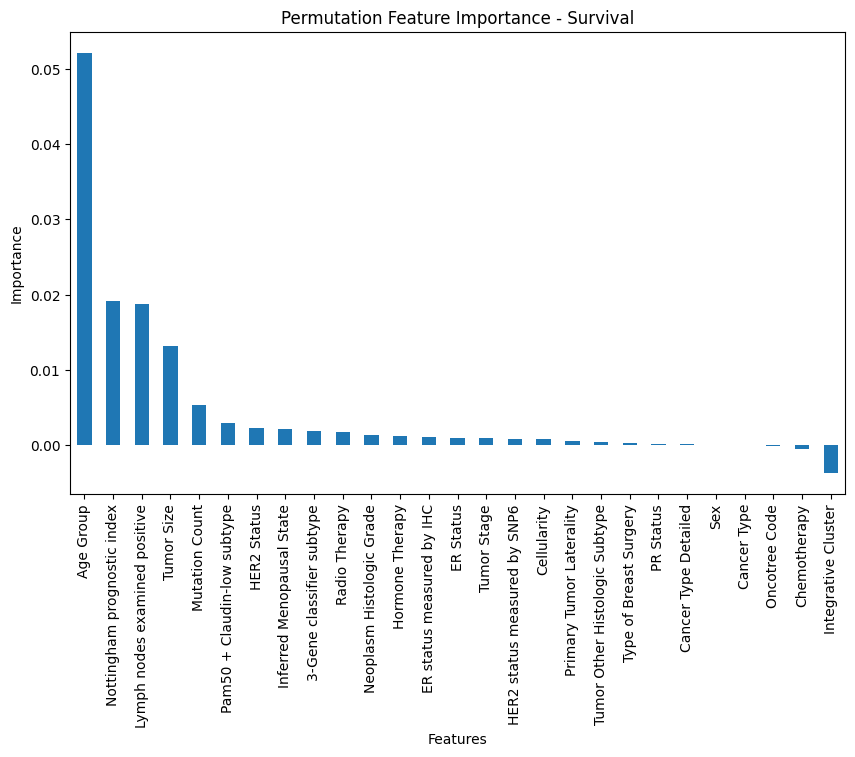

In [189]:
# Sort the feature importances in descending order and plot
sorted_importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Permutation Feature Importance - Survival')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [196]:
# Feature Selection based on importance
N = 10
top_feature_indices = np.argsort(importances)[::-1][:N]
top_features = X.columns[top_feature_indices]

# Reduce feature set
X_train_reduced = X_train_s[top_features]
X_test_reduced = X_test_s[top_features]

In [197]:
# Re-train
rsf_survival_reduced = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
rsf_survival_reduced.fit(X_train_reduced, Y_train_s)

# Evaluate on the reduced test set
prediction_reduced = rsf_survival_reduced.predict(X_test_reduced)
ci_reduced = concordance_index_censored(Y_test_s['Overall Survival Status'], Y_test_s['Overall Survival (Months)'], prediction_reduced)
print("Concordance Index with Reduced Features on Test Set:", ci_reduced[0])

Concordance Index with Reduced Features on Test Set: 0.7018873576992211


## Relapse

In [146]:
def c_index_score(estimator, X, y):
    prediction = estimator.predict(X)
    return concordance_index_censored(y['Relapse Free Status'], y['Relapse Free Status (Months)'], prediction)[0]

In [147]:
# Relapse
rsf_survival = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
scores_survival = cross_val_score(rsf_survival, X_train_r, Y_train_r, cv=5, scoring=c_index_score)
print("Relapse Analysis - Cross-Validation Concordance Index scores:", scores_survival)

rsf_survival.fit(X_train_r, Y_train_r)
prediction_survival = rsf_survival.predict(X_test_r)
ci_survival = concordance_index_censored(Y_test_r['Relapse Free Status'], Y_test_r['Relapse Free Status (Months)'], prediction_survival)
print("Relapse Analysis - Concordance Index on Test Set:", ci_survival[0])

Relapse Analysis - Cross-Validation Concordance Index scores: [0.63218128 0.60433009 0.67565378 0.70086977 0.67484299]
Relapse Analysis - Concordance Index on Test Set: 0.6474265774934574


In [150]:
# Feature Importance
result = permutation_importance(
    rsf_survival, X_test_r, Y_test_r,
    n_repeats=10,    # Number of times to shuffle each feature
    random_state=42,
    scoring=c_index_score
)

importances = pd.Series(result.importances_mean, index=X_test_r.columns)

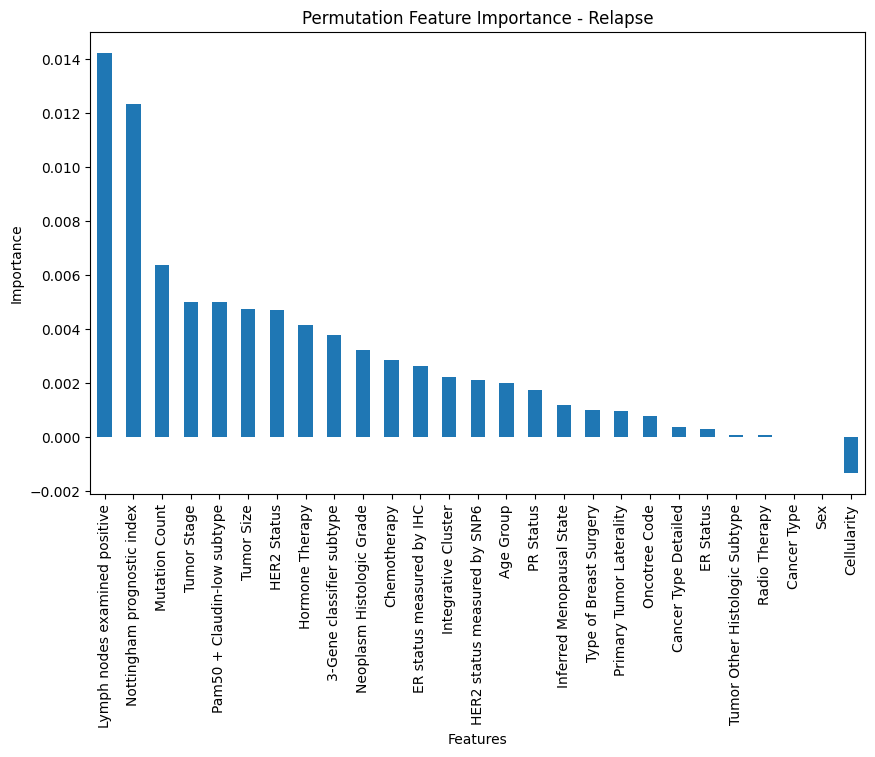

In [151]:
# Sort the feature importances in descending order and plot
sorted_importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Permutation Feature Importance - Relapse')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [184]:
# Feature Selection based on importance
N = 10
top_feature_indices = np.argsort(importances)[::-1][:N]
top_features = X.columns[top_feature_indices]

# Reduce feature set
X_train_reduced = X_train_r[top_features]
X_test_reduced = X_test_r[top_features]

In [185]:
# Re-train
rsf_survival_reduced = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
rsf_survival_reduced.fit(X_train_reduced, Y_train_r)

# Evaluate on the reduced test set
prediction_reduced = rsf_survival_reduced.predict(X_test_reduced)
ci_reduced = concordance_index_censored(Y_test_r['Relapse Free Status'], Y_test_r['Relapse Free Status (Months)'], prediction_reduced)
print("Concordance Index with Reduced Features on Test Set:", ci_reduced[0])

Concordance Index with Reduced Features on Test Set: 0.6513157894736842
